<a href="https://colab.research.google.com/github/muga01/TMAWrapper/blob/main/thesis_report_diagrams_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sigmoid Function Plot
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn import datasets
np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Literature"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure sigmoid


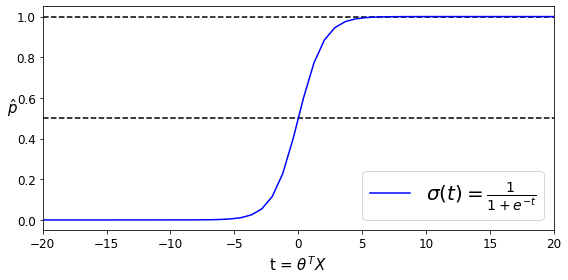

In [3]:
x = np.linspace(-20,20)
sigmoid = 1/(1+np.exp(-x))
plt.figure(figsize=(8,4))
plt.plot(x,sigmoid,color='blue',label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.hlines(1,-20,20,linestyles='dashed')
plt.hlines(0.5,-20,20,linestyles='dashed')
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel(r"$\^p$", rotation=0,fontsize=15)
plt.xlabel(r"t = $\theta^{T}X$",fontsize=15)
plt.legend(loc='lower right',fontsize=20)
save_fig('sigmoid')
plt.show();

Saving figure pca_best_projection_plot


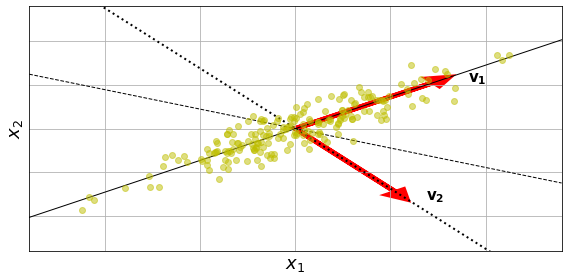

In [4]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
# plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "yo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='r', ec='r')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='r', ec='r')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{v_1}$", fontsize=15)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{v_2}$", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=90)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,
    labelleft=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

In [5]:

iris = datasets.load_iris()
X = iris["data"][:, (0, 1)]  # sepal length, petal width
y = iris["target"]

setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


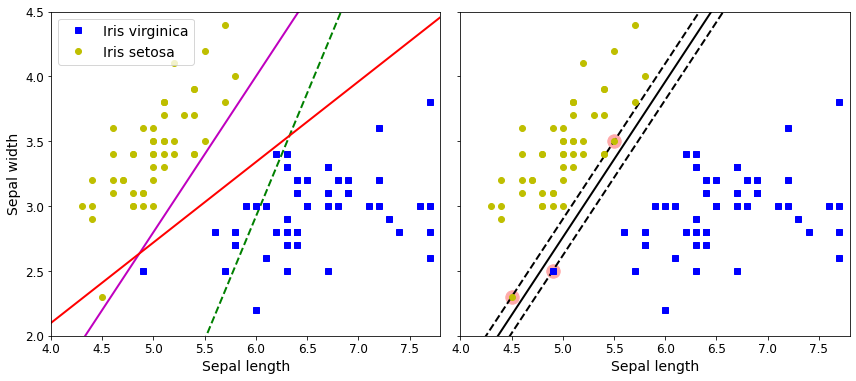

In [6]:
# Bad models
x0 = np.linspace(2, 7.8, 200)
pred_1 = 1.9*x0 - 8.48
pred_2 = 1.2*x0 - 3.2
pred_3 = 0.62 * x0 - 0.38

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(12,5.4), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([4, 7.8, 2, 4.5])


plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 4, 7.8)
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Sepal length", fontsize=14)
plt.axis([4, 7.8, 2, 4.5])


save_fig("large_margin_classification_plot")
plt.show()